# Saadat validations

In [1]:
from mxlbricks import get_saadat2021
from mxlpy import units
import mxlbricks.names as n
import matplotlib.pyplot as plt

m = get_saadat2021()
m.update_reaction(n.rubisco_carboxylase(), unit=units.mmol / (units.liter * units.second)); # Add Vc unit mM/s
file_prepend = "presentation"  # Path to save figures
file_append = "saadat2021"  # Identifier for the model validation

In [2]:
pfd_str = n.pfd()
vc_str = n.rubisco_carboxylase()
atp_str = n.atp()
nadph_str = n.nadph()
flourescence_str = n.fluorescence()
co2_str = n.co2()
pco2_str = None
H_cp_co2_str = None
gammastar_str = None
r_light_str = None
A_str = None
coeff_psii_str = "k2"
coeff_psi_str = None
coeff_rubisco_str = n.kcat(n.rubisco_carboxylase())
coeff_cytb6f_str = n.kcat(n.b6f())
coeff_atp_synthase_str = n.kf(n.atp_synthase())
rubp_str = n.rubp()
pq_str = n.pq_ox()
pc_str = n.pc_ox()
v_psii_str = "PSII"
v_psi_str = "PSI"
v_cytb6f_str = n.b6f()
v_atp_synthase_str = n.atp_synthase()

In [3]:
n.kf(n.atp_synthase())

'kf_atp_synthase'

## Day simulation

Trying simulation with 1200 time points per step.


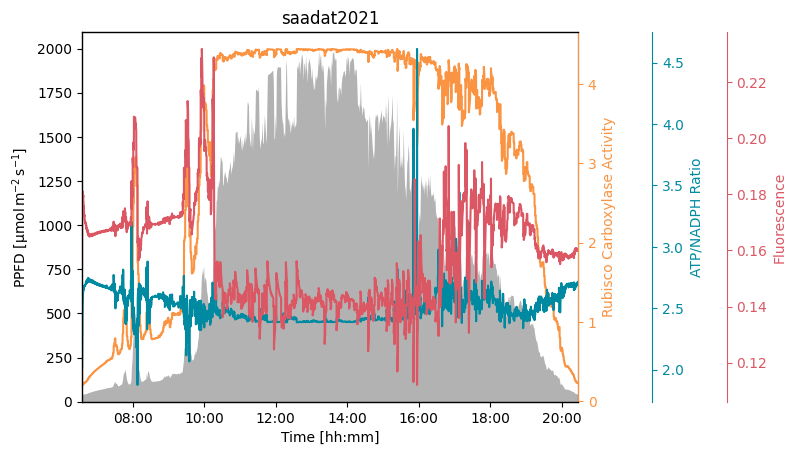

In [4]:
from GreenSlothUtils.demonstration import create_day_simulation_fig

fig, ax = create_day_simulation_fig(
    model=m,
    pfd=pfd_str,
    vc=vc_str,
    atp=atp_str,
    nadph=nadph_str,
    fluorescence=flourescence_str
)

ax.set_title(file_append)

plt.savefig(f"{file_prepend}/day_simulation/{file_append}.png", dpi=300, bbox_inches='tight')

## Pam Fig

In [5]:
from pam_fig import create_pam_fig

fig, axs = create_pam_fig(
    model=m,
    pfd_str=pfd_str,
    flourescence_str=flourescence_str,
    npq_str=None
)

axs["Fluo"].text(0.5, 1.1, file_append, ha='center', va='bottom', transform=axs["Fluo"].transAxes)

plt.savefig(f"{file_prepend}/pam_fig/{file_append}.png", dpi=300, bbox_inches='tight');

AttributeError: 'Result' object has no attribute 'get_new_y0'

## FvCB

100%|██████████| 100/100 [00:02<00:00, 34.00it/s]


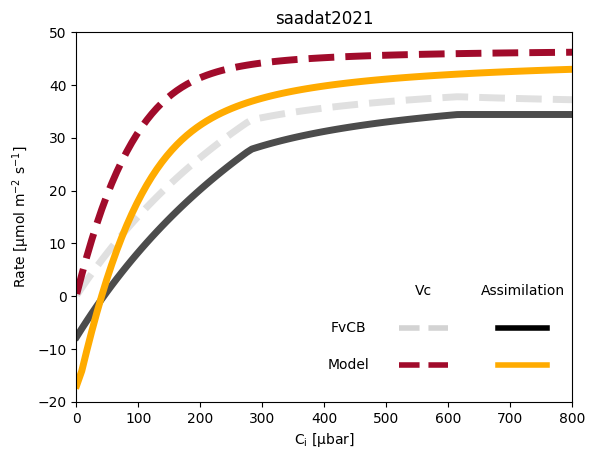

: 

: 

In [ ]:
from inject_fvcb import create_fvcb_fig

fig, ax = create_fvcb_fig(
    model=m,
    pfd=pfd_str,
    co2=co2_str,
    vc=vc_str,
    pco2=pco2_str,
    H_cp_co2=H_cp_co2_str,
    gammastar=gammastar_str,
    r_light=r_light_str,
    A=A_str
)

ax.set_title(file_append)

plt.savefig(f"{file_prepend}/fvcb/{file_append}.png", dpi=300, bbox_inches='tight')

## MCA

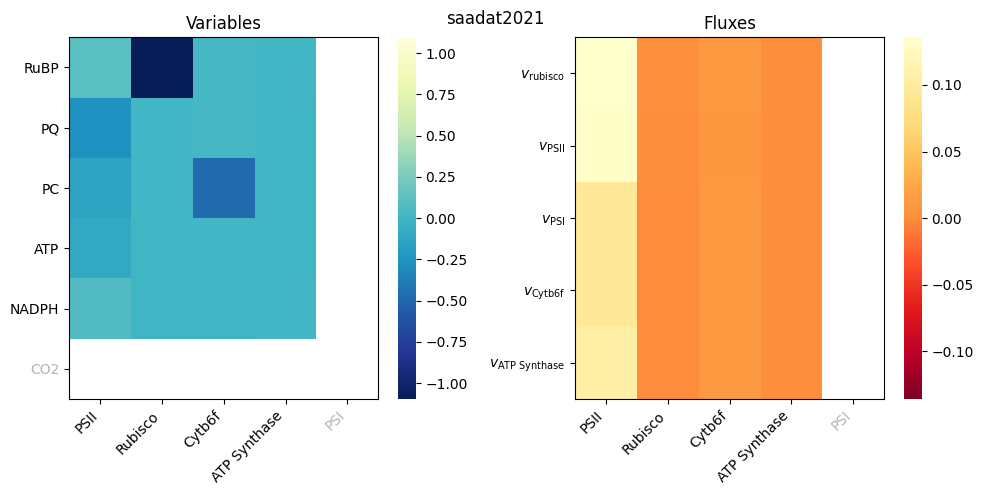

: 

: 

In [ ]:
from photosynthesis_mca import create_mca_fig

fig, ax = create_mca_fig(
    model=m,
    coeff_psii=coeff_psii_str,
    coeff_psi=coeff_psi_str,
    coeff_rubisco=coeff_rubisco_str,
    coeff_cytb6f=coeff_cytb6f_str,
    coeff_atp_synthase=coeff_atp_synthase_str,
    rubp=rubp_str,
    co2=co2_str,
    pq=pq_str,
    pc=pc_str,
    atp=atp_str,
    nadph=nadph_str,
    v_rubisco=vc_str,
    v_psii=v_psii_str,
    v_psi=v_psi_str,
    v_cytb6f=v_cytb6f_str,
    v_atp_synthase=v_atp_synthase_str,
)

fig.suptitle(file_append)

plt.savefig(f"{file_prepend}/mca/{file_append}.png", dpi=300, bbox_inches='tight')

## Fitting

100%|██████████| 167/167 [00:00<00:00, 176.02it/s]


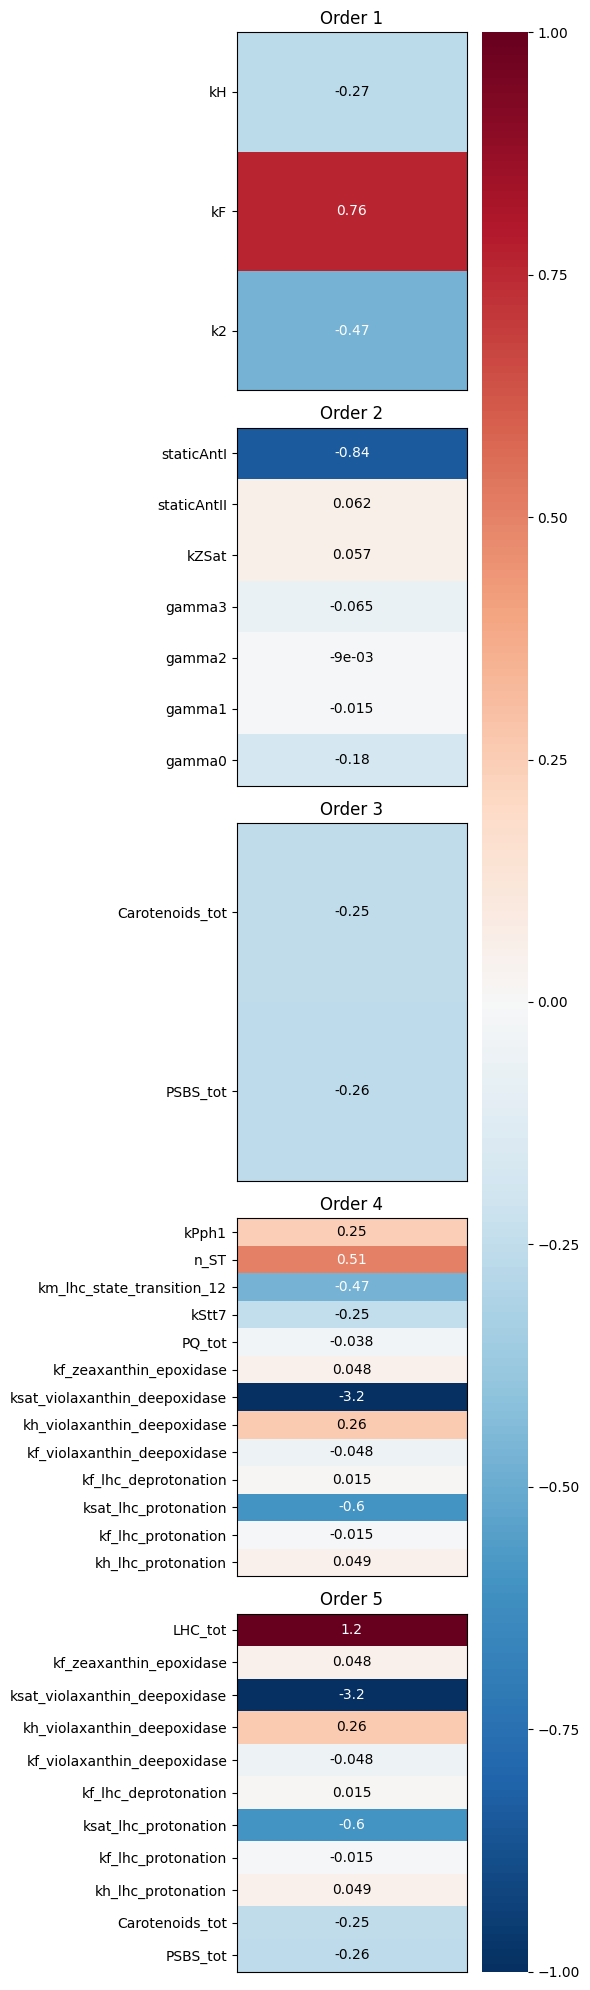

: 

: 

In [ ]:
from utils import find_params_to_fit_byelasticities, find_params_to_fit_byorder

find_params_to_fit_byorder(
    to_fit_str=flourescence_str,
    model=m,
)

100%|██████████| 167/167 [00:00<00:00, 178.11it/s]


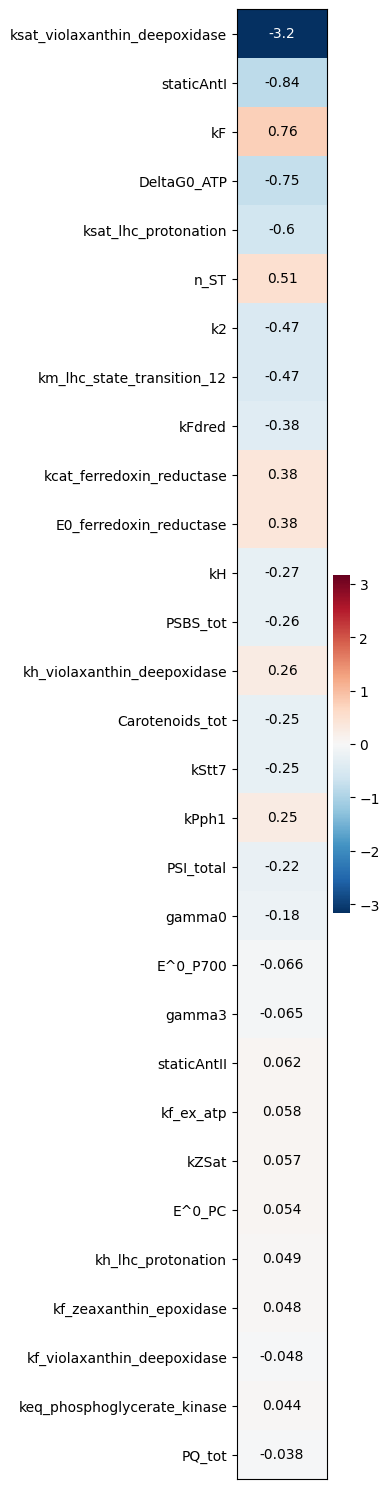

: 

: 

In [ ]:
find_params_to_fit_byelasticities(
    to_fit_str=n.fluorescence(),
    model=m,
    omit_strs=["pH", "T", "R", "F", "E^0_PQ", "E^0_QA", "HPR", "PSII_total", "LHC_tot"]
)

[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 866.902847771926 and h = 0.00405002942032856, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 683.895993026127 and h = 0.00483289600074798, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 988.880426252295 and h = 0.00410585008401577, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 1049.86915404601 and h = 0.00378427761407259, t

{'ksat_violaxanthin_deepoxidase': 5.613273500889613, 'gamma0': 0.09843548320455198, 'ksat_lhc_protonation': 5.816954960013977}


[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 866.904460899455 and h = 0.00520595447086105, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 866.902847771926 and h = 0.00405002942032856, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 683.895993026127 and h = 0.00483289600074798, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 988.880426252295 and h = 0.00410585008401577, t

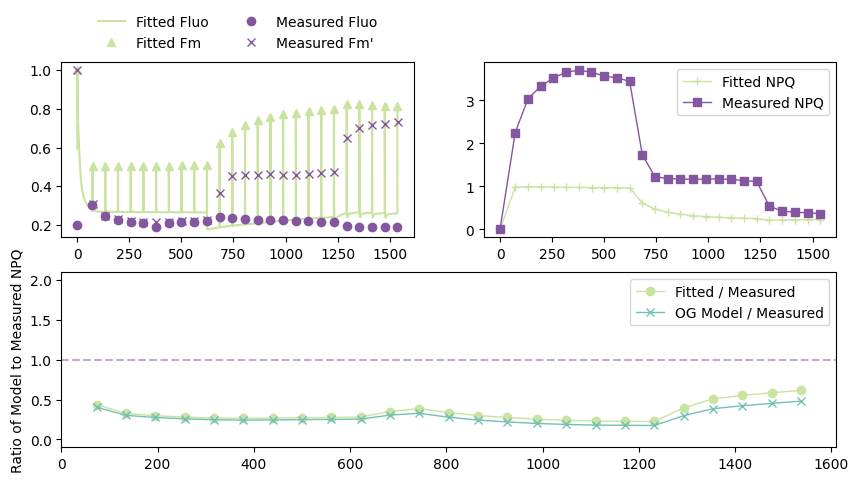

: 

: 

In [ ]:
from fitting import create_pamfit

create_pamfit(
    model=m,
    pfd_str=pfd_str,
    flourescence_str=flourescence_str,
    pam_params_to_fit=["ksat_violaxanthin_deepoxidase", "gamma0", "ksat_lhc_protonation"],
    relative=True,
    standard_scale=True
)

plt.savefig(f"{file_prepend}/fitting/{file_append}.png", dpi=300)